In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv("/content/dataset.csv")

# EDA

In [ ]:
data

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23000,10.20,116.35,59.96,54.85,21.29,pomegranate
1,170,36,216,5.9,0.15,0.28000,15.69,114.20,56.87,31.28,28.62,pomegranate
2,158,66,219,6.8,0.34,0.20000,15.29,65.87,51.81,57.12,27.59,pomegranate
3,133,45,207,6.4,0.94,0.21000,8.48,103.10,43.81,68.50,47.29,pomegranate
4,132,48,218,6.7,0.54,0.19000,5.59,63.40,56.40,46.71,31.04,pomegranate
...,...,...,...,...,...,...,...,...,...,...,...,...
615,41,23,135,5.0,1.67,0.10655,26.00,39.20,206.89,31.09,20.64,potato
616,49,45,90,5.8,1.98,0.09229,19.00,40.20,91.12,32.68,14.91,potato
617,131,24,121,4.9,2.24,0.08775,22.00,40.00,94.34,24.93,23.74,potato
618,131,55,130,5.3,2.48,0.08983,15.00,41.00,92.58,45.73,21.48,potato


In [ ]:
data.isna()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
615,False,False,False,False,False,False,False,False,False,False,False,False
616,False,False,False,False,False,False,False,False,False,False,False,False
617,False,False,False,False,False,False,False,False,False,False,False,False
618,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

N        0
P        0
K        0
ph       0
EC       0
S        0
Cu       0
Fe       0
Mn       0
Zn       0
B        0
label    0
dtype: int64

In [ ]:
column_names = data.columns.tolist()
print(column_names)

['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B', 'label']


In [ ]:
enco= LabelEncoder()
data.label = enco.fit_transform(data.label)

In [ ]:
data

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23000,10.20,116.35,59.96,54.85,21.29,3
1,170,36,216,5.9,0.15,0.28000,15.69,114.20,56.87,31.28,28.62,3
2,158,66,219,6.8,0.34,0.20000,15.29,65.87,51.81,57.12,27.59,3
3,133,45,207,6.4,0.94,0.21000,8.48,103.10,43.81,68.50,47.29,3
4,132,48,218,6.7,0.54,0.19000,5.59,63.40,56.40,46.71,31.04,3
...,...,...,...,...,...,...,...,...,...,...,...,...
615,41,23,135,5.0,1.67,0.10655,26.00,39.20,206.89,31.09,20.64,4
616,49,45,90,5.8,1.98,0.09229,19.00,40.20,91.12,32.68,14.91,4
617,131,24,121,4.9,2.24,0.08775,22.00,40.00,94.34,24.93,23.74,4
618,131,55,130,5.3,2.48,0.08983,15.00,41.00,92.58,45.73,21.48,4


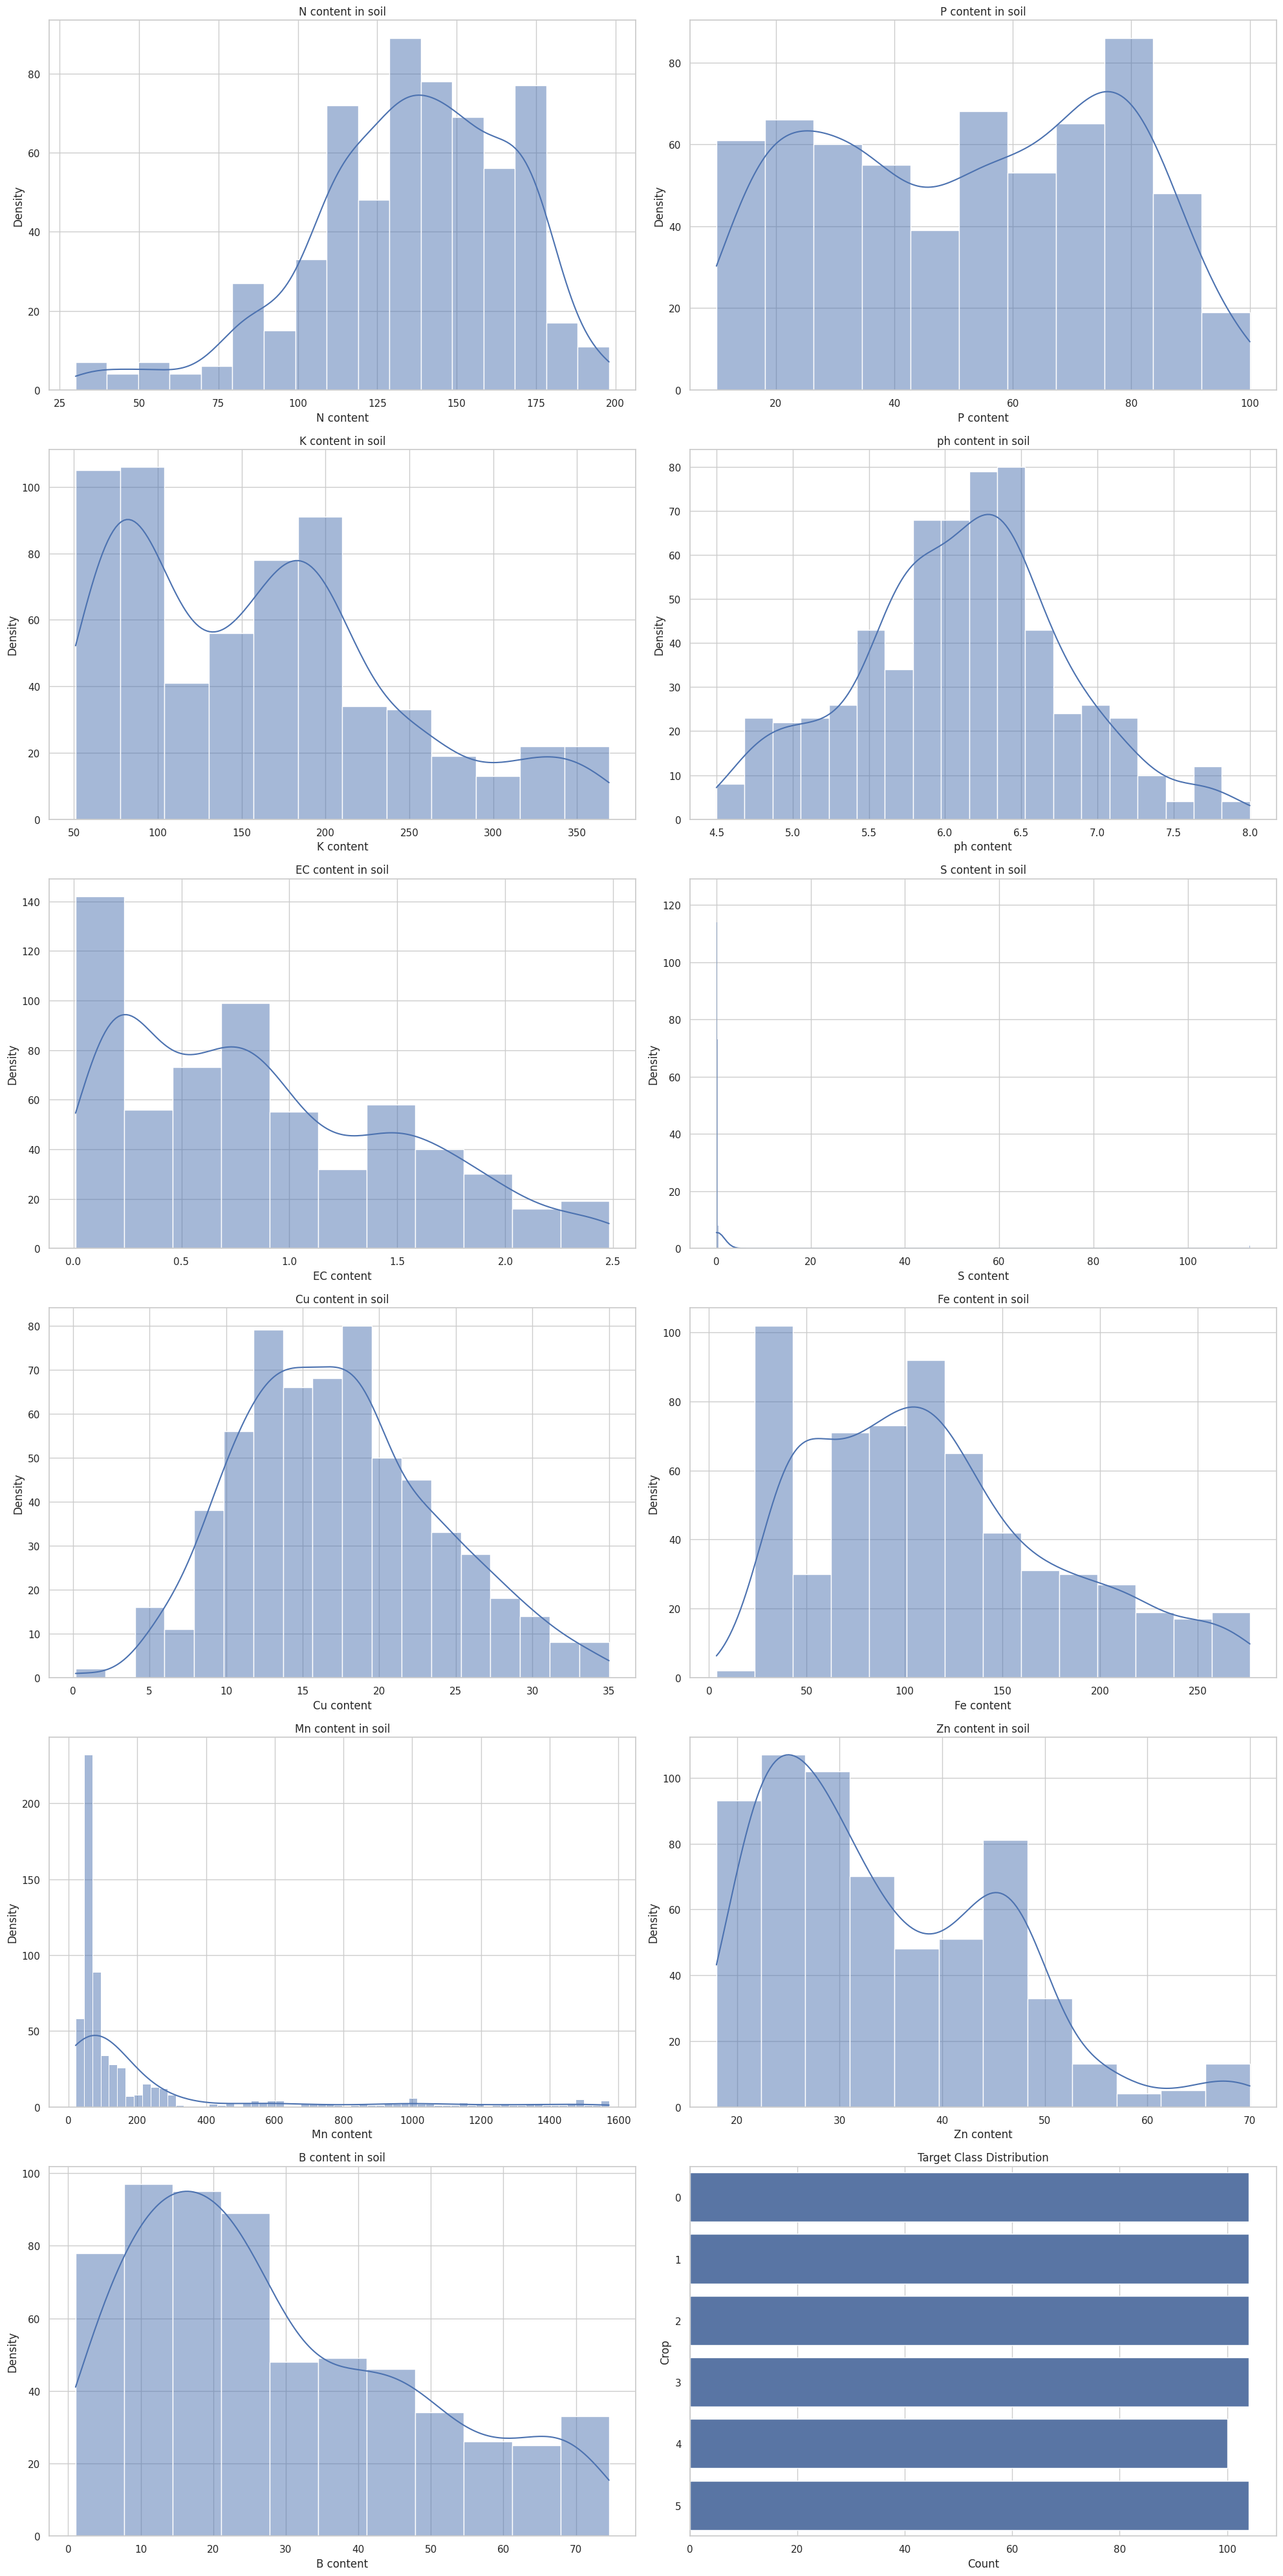

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(20, 40))

for i, col in enumerate(data.columns):
    plt.subplot(6, 2, i + 1)

    if col == "label":
        sns.countplot(y='label', data=data)
        plt.xlabel("Count")
        plt.ylabel("Crop")
        plt.title("Target Class Distribution")

    else:
        sns.histplot(data[col], kde=True)
        plt.xlabel(col + " content")
        plt.ylabel("Density")
        plt.title(col + " content in soil")

plt.tight_layout()

plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels = oversample.fit_resample(data.drop(["label"],axis=1), data.label)

# RANDOM FOREST

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(features,labels,test_size=0.2, shuffle=True)

In [ ]:
rf = RandomForestClassifier(n_estimators=15,random_state=0)
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=15, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

train_preds = rf.predict(train_x)
test_preds = rf.predict(test_x)

train_accuracy = accuracy_score(train_preds, train_y) * 100
test_accuracy = accuracy_score(test_preds, test_y) * 100
precision = precision_score(test_preds, test_y, average="micro") * 100
recall = recall_score(test_preds, test_y, average="micro") * 100

print(f"Train Accuracy : {train_accuracy:.2f} %")
print(f"Test Accuracy  : {test_accuracy:.2f} %")
print(f"Precision      : {precision:.2f} %")
print(f"Recall         : {recall:.2f} %")


Train Accuracy : 99.80 %
Test Accuracy  : 96.80 %
Precision      : 96.80 %
Recall         : 96.80 %


<Figure size 1000x1000 with 0 Axes>

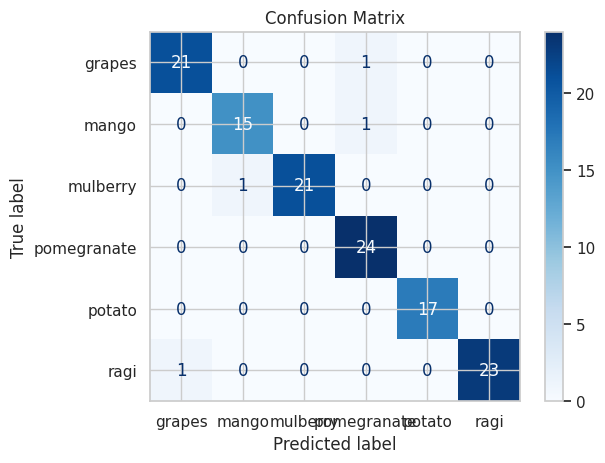

In [ ]:
cm = confusion_matrix(test_preds, test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[enco.classes_[i] for i in rf.classes_])
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), activation='tanh', solver='adam',
                          alpha=0.0001, batch_size='auto', learning_rate='constant',
                          learning_rate_init=0.001, max_iter=300, random_state=42)

mlp_model.fit(train_x, train_y)

train_preds = mlp_model.predict(train_x)
test_preds = mlp_model.predict(test_x)

train_accuracy = accuracy_score(train_preds, train_y) * 100
test_accuracy = accuracy_score(test_preds, test_y) * 100
precision = precision_score(test_preds, test_y, average="micro") * 100
recall = recall_score(test_preds, test_y, average="micro") * 100

print(f"Train Accuracy : {train_accuracy:.2f} %")
print(f"Test Accuracy  : {test_accuracy:.2f} %")
print(f"Precision      : {precision:.2f} %")
print(f"Recall         : {recall:.2f} %")


Train Accuracy : 97.80 %
Test Accuracy  : 95.20 %
Precision      : 95.20 %
Recall         : 95.20 %


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

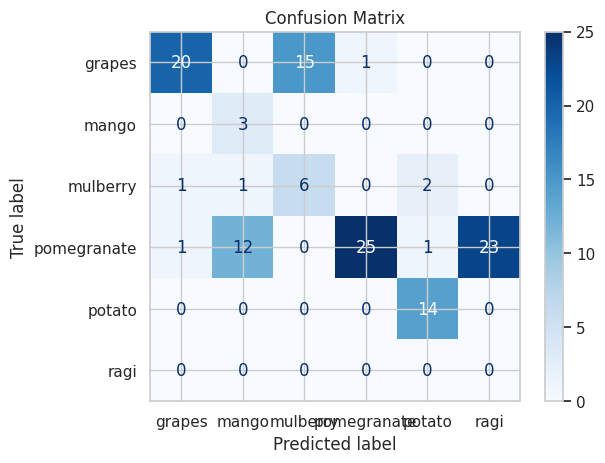

In [ ]:
cm_MLP = confusion_matrix(test_preds, test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[enco.classes_[i] for i in rf.classes_])
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=75, random_state=42)

adaboost_model.fit(train_x, train_y)

train_preds = adaboost_model.predict(train_x)
test_preds = adaboost_model.predict(test_x)

train_accuracy = accuracy_score(train_preds, train_y) * 100
test_accuracy = accuracy_score(test_preds, test_y) * 100
precision = precision_score(test_preds, test_y, average="micro") * 100
recall = recall_score(test_preds, test_y, average="micro") * 100

print(f"Train Accuracy : {train_accuracy:.2f} %")
print(f"Test Accuracy  : {test_accuracy:.2f} %")
print(f"Precision      : {precision:.2f} %")
print(f"Recall         : {recall:.2f} %")

Train Accuracy : 45.89 %
Test Accuracy  : 54.40 %
Precision      : 54.40 %
Recall         : 54.40 %


<Figure size 1000x1000 with 0 Axes>

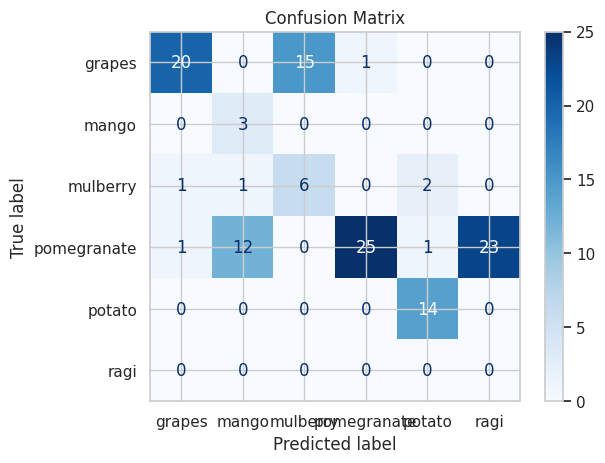

In [ ]:
cm_AdaBoost= confusion_matrix(test_preds, test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[enco.classes_[i] for i in rf.classes_])
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(train_x, train_y)

train_preds = gbm_classifier.predict(train_x)
test_preds = gbm_classifier.predict(test_x)

train_accuracy = accuracy_score(train_preds, train_y) * 100
test_accuracy = accuracy_score(test_preds, test_y) * 100
precision = precision_score(test_preds, test_y, average="micro") * 100
recall = recall_score(test_preds, test_y, average="micro") * 100

print(f"Train Accuracy : {train_accuracy:.2f} %")
print(f"Test Accuracy  : {test_accuracy:.2f} %")
print(f"Precision      : {precision:.2f} %")
print(f"Recall         : {recall:.2f} %")

Train Accuracy : 100.00 %
Test Accuracy  : 96.00 %
Precision      : 96.00 %
Recall         : 96.00 %


<Figure size 1000x1000 with 0 Axes>

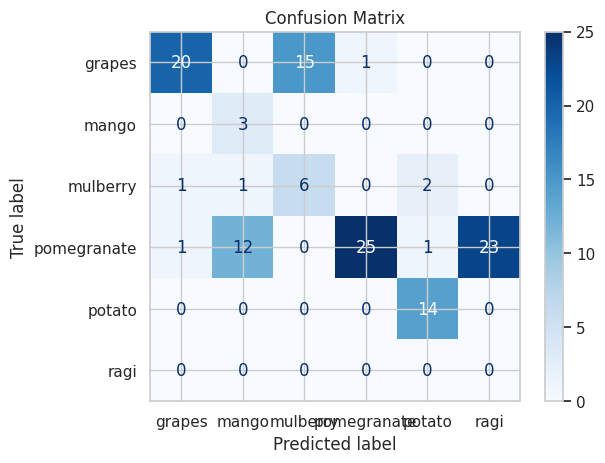

In [ ]:
cm_Gradientboost= confusion_matrix(test_preds, test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[enco.classes_[i] for i in rf.classes_])
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()

naive_bayes.fit(train_x, train_y)

train_preds = naive_bayes.predict(train_x)
test_preds = naive_bayes.predict(test_x)

train_accuracy = accuracy_score(train_preds, train_y) * 100
test_accuracy = accuracy_score(test_preds, test_y) * 100
precision = precision_score(test_preds, test_y, average="micro") * 100
recall = recall_score(test_preds, test_y, average="micro") * 100


print(f"Train Accuracy : {train_accuracy:.2f} %")
print(f"Test Accuracy  : {test_accuracy:.2f} %")
print(f"Precision      : {precision:.2f} %")
print(f"Recall         : {recall:.2f} %")




Train Accuracy : 92.38 %
Test Accuracy  : 93.60 %
Precision      : 93.60 %
Recall         : 93.60 %


<Figure size 1000x1000 with 0 Axes>

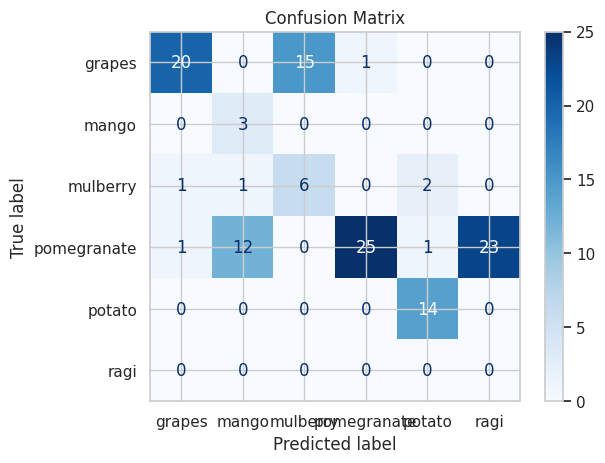

In [ ]:
cm_NaiveBayes= confusion_matrix(test_preds, test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[enco.classes_[i] for i in rf.classes_])
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Catboost

In [ ]:
pip install Catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    'iterations': [100, 1000],
    'learning_rate': [0.025, 0.5],
    'depth': [4, 6]
}

random_search = RandomizedSearchCV(estimator=CatBoostClassifier(random_seed=42),
                                   param_distributions=param_grid,
                                   n_iter=7,
                                   cv=7,
                                   scoring='accuracy',
                                   random_state=42)


random_search.fit(train_x, train_y)

best_params = random_search.best_params_

best_catboost_classifier = CatBoostClassifier(**best_params, random_seed=42)

best_catboost_classifier.fit(train_x, train_y)

train_preds = best_catboost_classifier.predict(train_x)
test_preds = best_catboost_classifier.predict(test_x)

train_accuracy = accuracy_score(train_preds, train_y) * 100
test_accuracy = accuracy_score(test_preds, test_y) * 100
precision = precision_score(test_preds, test_y, average="micro") * 100
recall = recall_score(test_preds, test_y, average="micro") * 100

print(f"Train Accuracy : {train_accuracy:.2f} %")
print(f"Test Accuracy  : {test_accuracy:.2f} %")
print(f"Precision      : {precision:.2f} %")
print(f"Recall         : {recall:.2f} %")


Streaming output truncated to the last 5000 lines.
204:	learn: 0.0076302	total: 839ms	remaining: 3.25s
205:	learn: 0.0076167	total: 843ms	remaining: 3.25s
206:	learn: 0.0075787	total: 847ms	remaining: 3.24s
207:	learn: 0.0075247	total: 851ms	remaining: 3.24s
208:	learn: 0.0074828	total: 855ms	remaining: 3.23s
209:	learn: 0.0074705	total: 858ms	remaining: 3.23s
210:	learn: 0.0074171	total: 862ms	remaining: 3.22s
211:	learn: 0.0073175	total: 867ms	remaining: 3.22s
212:	learn: 0.0072924	total: 871ms	remaining: 3.22s
213:	learn: 0.0072743	total: 874ms	remaining: 3.21s
214:	learn: 0.0072580	total: 877ms	remaining: 3.2s
215:	learn: 0.0072109	total: 881ms	remaining: 3.2s
216:	learn: 0.0071595	total: 887ms	remaining: 3.2s
217:	learn: 0.0071494	total: 893ms	remaining: 3.2s
218:	learn: 0.0071401	total: 897ms	remaining: 3.2s
219:	learn: 0.0070822	total: 901ms	remaining: 3.19s
220:	learn: 0.0070473	total: 906ms	remaining: 3.19s
221:	learn: 0.0070018	total: 910ms	remaining: 3.19s
222:	learn: 0.0069

<Figure size 1000x1000 with 0 Axes>

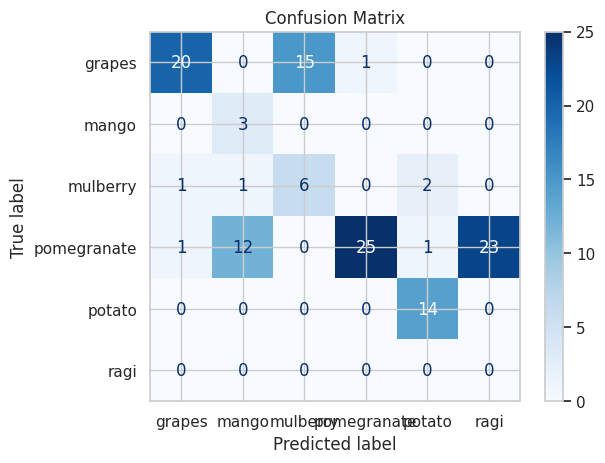

In [ ]:
cm_CatBoost= confusion_matrix(test_preds, test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[enco.classes_[i] for i in rf.classes_])
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [1, 0.1]
}

svm_model = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid)

svm_model.fit(X_train_scaled, y_train)

print(f"Best estimators for SVM: {svm_model.best_estimator_}")

best_svm_model = svm_model.best_estimator_
train_preds = best_svm_model.predict(X_train_scaled)
test_preds = best_svm_model.predict(X_test_scaled)

train_accuracy = accuracy_score(train_preds, y_train) * 100
test_accuracy = accuracy_score(test_preds, y_test) * 100
precision = precision_score(test_preds, y_test, average="micro") * 100
recall = recall_score(test_preds, y_test, average="micro") * 100

print(f"Train Accuracy : {train_accuracy:.2f} %")
print(f"Test Accuracy  : {test_accuracy:.2f} %")
print(f"Precision      : {precision:.2f} %")
print(f"Recall         : {recall:.2f} %")




Best estimators for SVM: SVC(C=0.001, class_weight='balanced', gamma=0.1, kernel='poly', random_state=42)
Train Accuracy : 96.59 %
Test Accuracy  : 98.40 %
Precision      : 98.40 %
Recall         : 98.40 %


<Figure size 1000x1000 with 0 Axes>

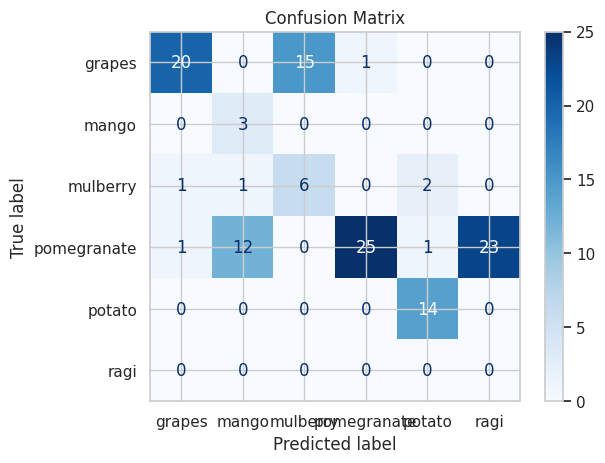

In [ ]:
cm_SVM= confusion_matrix(test_preds, test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[enco.classes_[i] for i in rf.classes_])
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Results

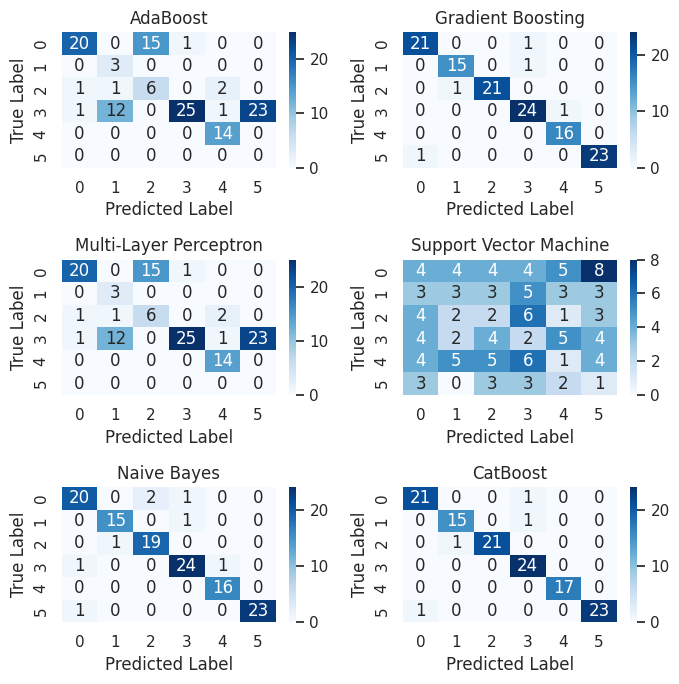

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(7, 7))

for ax, model_name, confusion_matrix in zip(axes.flatten(), model_names, confusion_matrices):
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
plt.tight_layout()
plt.savefig('cm1.png')